In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
data = pd.read_csv("kc_house_data.csv",encoding="ISO-8859-1",sep=',')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# column id not important
data.drop('id',inplace=True,axis=1)

In [14]:
# I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
data['Month'] = data['date'].apply(lambda date: date.month)
data['Year'] = data['date'].apply(lambda date: date.year)
data['Day'] = data['date'].apply(lambda date: date.day)

In [18]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,Day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,18


In [20]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

In [23]:
data.drop('date',inplace=True,axis=1)

In [24]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
Day              0
dtype: int64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='price', ylabel='Count'>

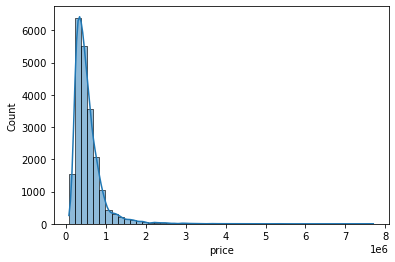

In [27]:
sns.histplot(data['price'],kde=True,bins=50)


<AxesSubplot:>

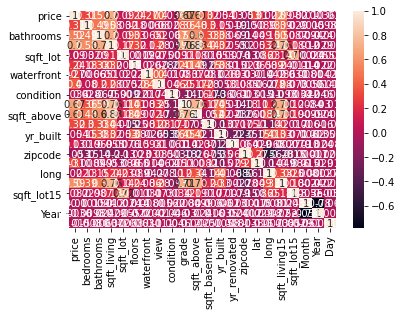

In [28]:
sns.heatmap(data.corr(),annot=True)

In [29]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

<AxesSubplot:>

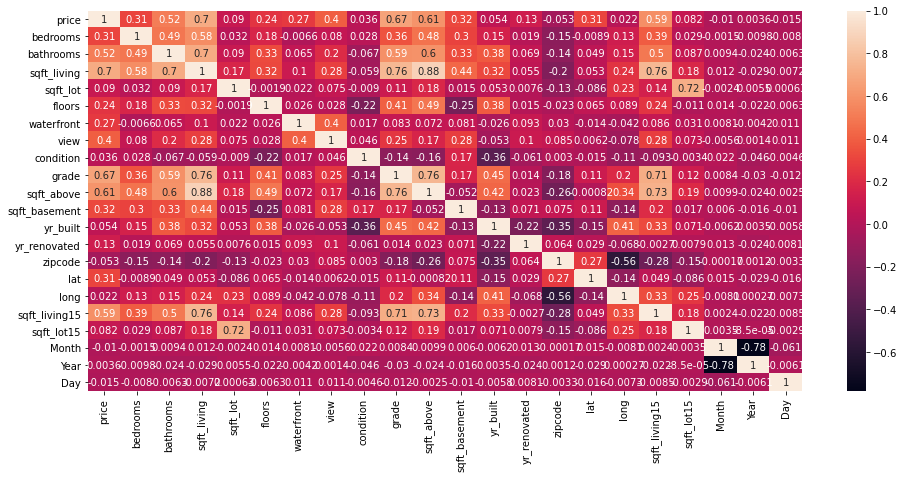

In [30]:
resizeplot(16,7)
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

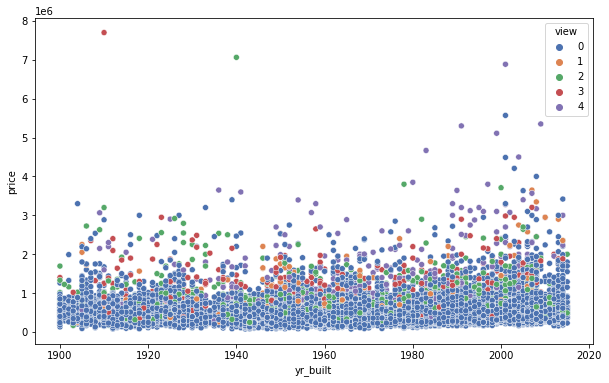

In [31]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=data,hue='view',palette = 'deep')

In [33]:
data[data['price']>6e6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,Day
3914,7062500.0,5,4.0,10040,37325,2.0,1,2,3,11,...,1940,2001,98004,47.6500,-122.214,3930,25449,6,2014,11
7252,7700000.0,6,8.0,12050,27600,2.0,0,3,4,13,...,1910,1987,98102,47.6298,-122.323,3940,8800,10,2014,13
9254,6885000.0,6,8.0,9890,31374,2.0,0,4,3,13,...,2001,0,98039,47.6305,-122.240,4540,42730,9,2014,19


<AxesSubplot:xlabel='view', ylabel='count'>

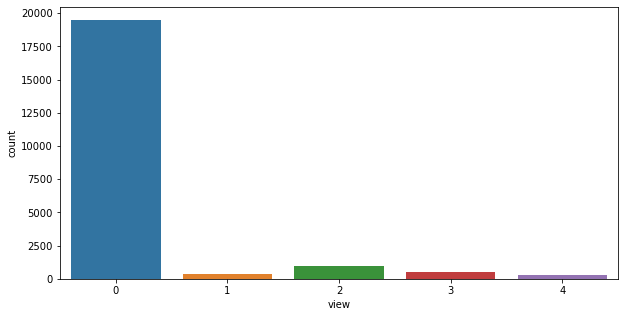

In [34]:
resizeplot(10,5)
sns.countplot(x='view',data=data)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

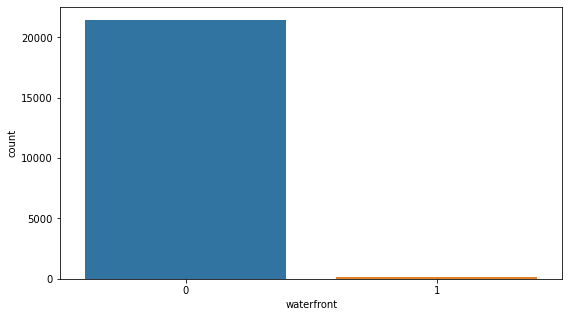

In [35]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=data)

<AxesSubplot:xlabel='Year', ylabel='price'>

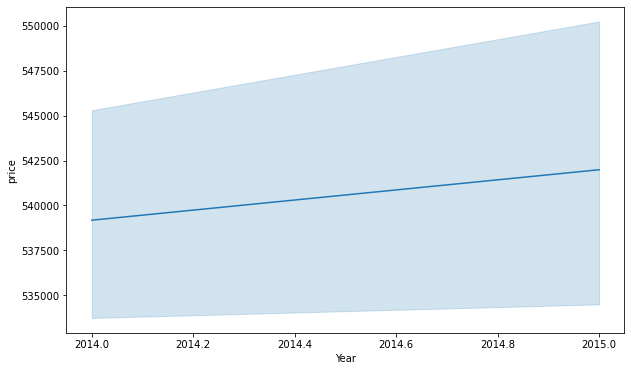

In [36]:
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=data)

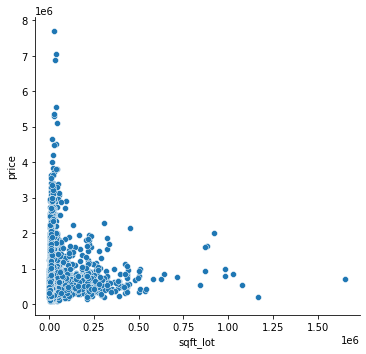

In [38]:
sns.relplot(x='sqft_lot',y='price',data=data,palette='terrain')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='Month', ylabel='price'>

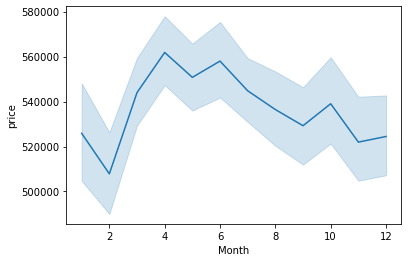

In [40]:
sns.lineplot(x='Month',y='price',data=data)

<AxesSubplot:xlabel='Day', ylabel='price'>

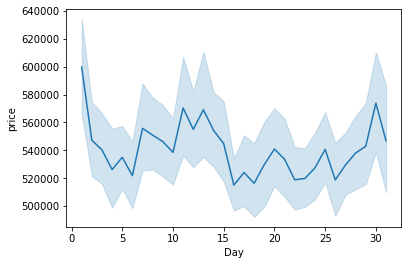

In [41]:
sns.lineplot(x='Day',y='price',data=data)

In [43]:
X = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','Year','Month']].values
y = data['price'].values


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [45]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.000e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 1.000e+00, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.000e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 1.000e+00, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [46]:
# LINEAR REGRESSION
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
pred = lr.predict(X_test)


In [49]:
score_lr = lr.score(X_train,y_train)
print(score_lr)

0.5990384947303965


In [53]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
mae_lr = mean_absolute_error(y_test,pred)
mse_lr = mean_squared_error(y_test,pred)
rmse_lr = np.sqrt(mse_lr)
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  149278.13572125536
Mse_lr:  50687807394.43721
Rmse_lr:  225139.52872482702


In [54]:
preco_lr = data['price']
predict_lr = pd.Series(pred)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,514786.138624,-292886.138624
1,538000.0,560865.533560,-22865.533560
2,180000.0,592228.860866,-412228.860866
3,604000.0,692640.966666,-88640.966666
4,510000.0,557968.672838,-47968.672838


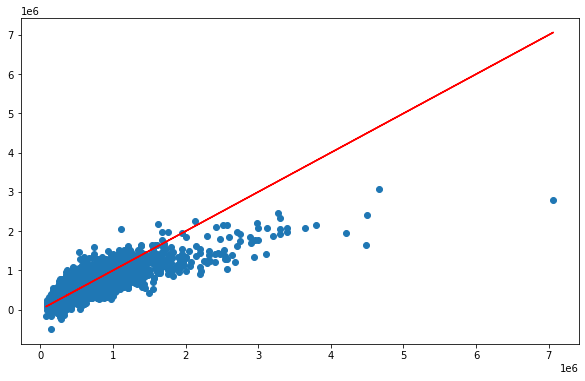

In [56]:
resizeplot(10,6)
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')

In [63]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr.fit(X_train_poly,y_train)

LinearRegression()

In [64]:
score_poly = lr.score(X_train_poly,y_train)
print(score_poly)

0.750219923301047


In [65]:
pred_poly = lr.predict(X_test_poly)

In [66]:
pred_poly

array([451361.11659357, 489216.75037786, 511200.36618093, ...,
       407518.58405927, 480814.21521768, 412704.80588987])

In [67]:
mae_poly = mean_absolute_error(y_test,pred_poly)
mse_poly = mean_squared_error(y_test,pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test,pred_poly))
print('Mae_poly:',mae_poly)
print('Mse_poly:',mse_poly)
print('Rmse_poly:',rmse_poly)

Mae_poly: 154915.88961404024
Mse_poly: 1557223120147.849
Rmse_poly: 1247887.4629339976


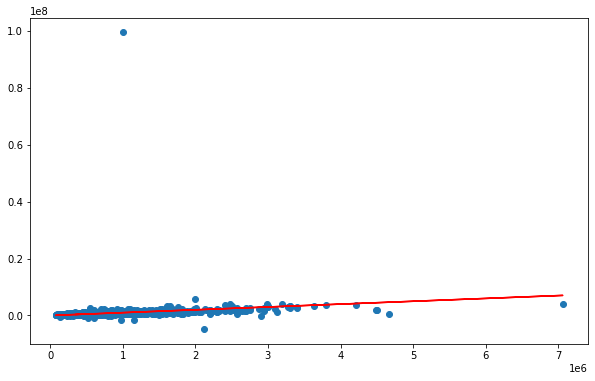

In [70]:
resizeplot(10,6)
plt.scatter(y_test,pred_poly)
plt.plot(y_test,y_test,color='red')